<a href="https://colab.research.google.com/github/manishaachary13/Vehicle-Sales-Forecasting/blob/main/vehicle_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -- **VEHICLE SALES FORECASTING**

##### **Project Type**    - ML
##### **Contribution**    - Individual
##### **Name**            - R MANISHA ACHARY

# **PROBLEM STATEMENT**

Vehicle sales forecasting is vital in the automotive industry, where efficient supply chain management, marketing, and production depend heavily on demand predictions. In this competitive domain, inaccurate forecasts can lead to overproduction, excess inventory costs, or missed opportunities due to stock shortages. The forecasting problem can address passenger vehicles, commercial vehicles, or specialized segments based on the dataset's granularity.


Since the output (vehicle sales) is labelled and dependent on historical patterns, this project falls under supervised learning. The dataset likely includes time-series data with chronological sales figures, requiring models that can predict future values. Factors such as economic growth, fuel prices, promotions, or holidays might affect sales, making this a multivariate forecasting problem.



#### **BUSINESS OBJECTIVES**

The objective is to create a data-driven forecasting model that predicts vehicle sales for upcoming periods (e.g., daily, weekly, monthly).

•   Ensure sufficient inventory to meet customer demand without overstocking.

•	Identify periods of high sales for promotional campaigns.

•	Help manufacturers align production schedules with demand forecasts.

•	Guide decision-making for expansion into new markets or adapting product portfolios.

•	Deliver a reliable forecasting model that generates accurate sales predictions.


•	Provide actionable insights into sales trends, seasonality, and demand patterns to inform business strategies.


#### **Constraints and Limitations**

•	The dataset contains adequate historical data with minimal missing values.

•	Time-series granularity (e.g., daily, weekly, monthly) affects the model’s accuracy and applicability. A fine-grained dataset enables more precise forecasting.

•	External features (e.g., fuel price, promotions, holidays) need to be comprehensive to capture additional demand signals.

•	Economic conditions, government policies, and regulations (e.g., tax incentives or EV subsidies) significantly affect sales trends. Seasonality and weather patterns may cause fluctuations in demand. Competitive dynamics: Promotions and new product launches by competitors.

•	Computational power for training models, especially when experimenting with deep learning techniques. Budgetary considerations for data collection, processing, and deployment. Model interpretability: The solution must be understandable to non-technical stakeholders.


#### **Evaluation Metrics**

•	The speed of predictions and interpretability should match business requirements, ensuring the model is actionable and deployable.

•	Simpler models (e.g., ARIMA or exponential smoothing) may suffice for short-term forecasts, whereas machine learning models (e.g., Gradient Boosting or LSTMs) might be necessary for capturing complex patterns.

•	Forecast Accuracy - MAPE (Mean Absolute Percentage Error): Measures prediction accuracy as a percentage of actual values, providing intuitive interpretability for stakeholders. RMSE (Root Mean Squared Error): Quantifies error magnitude and penalizes large deviations from actual values.


#### **Scope of the Solution**

•	Capabilities: Predict vehicle sales for various time horizons, regions, and vehicle categories (if applicable). Capture and explain seasonal peaks (e.g., holiday seasons, year-end sales). Include feature engineering to leverage external variables like promotions, economic data, and weather.

•	Boundaries: The project focuses on forecasting sales rather than optimizing supply chain logistics or pricing strategies. Model recommendations will depend on data quality and external variable availability.

•	Deployment Considerations: Develop a flexible solution deployable as a web app, API, or integration with internal systems. Incorporate mechanisms for periodic model retraining as new data becomes available.


####**Outcomes**

•	A time-series forecasting model capable of predicting future vehicle sales. Dashboards and visualizations highlighting trends, seasonality, and actionable insights. A final report summarizing methods, results, and recommendations.

•	Forecasts should guide inventory planning, marketing schedules, and production targets. Stakeholders should use insights to adapt strategies proactively, reducing risks and capitalizing on market opportunities.


####**Tools and Technologies**

•	Programming: Python (pandas, scikit-learn, statsmodels, TensorFlow).

•	Visualization: Tableau, Power BI, or Matplotlib.

•	Deployment: Flask API, AWS, or Google Cloud.


#  **DATA COLLECTION**

## ***1. Know Your Data***

### Import Libraries

In [66]:
# Essential Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [67]:
# Load Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# load dataset
file_path = '/content/drive/MyDrive/dataset/car_prices.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First Look

In [68]:
# Dataset First Look
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("CSV file read successfully using encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding with encoding:", encoding)

CSV file read successfully using encoding: utf-8


In [69]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1    

### Dataset Shape

In [70]:
# Display the number of rows and columns
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 558837 rows and 16 columns.


In [71]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### Dataset Info

In [72]:
# Display dataset information (data types, non-null counts, memory usage)
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


### Duplicated Rows

In [73]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"The dataset contains {duplicates} duplicate rows.")


The dataset contains 0 duplicate rows.


### Unique Value

In [74]:
# check for unique values
unique_values = df.nunique()
print("Unique Values in Each Column:")
print(unique_values)

Unique Values in Each Column:
year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64


### Null Value/Missing Value

In [75]:
# Check for missing values in each column
print("Missing/Null Values in Each Column:")
print(df.isnull().sum())


Missing/Null Values in Each Column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


### Visualising Missing Value

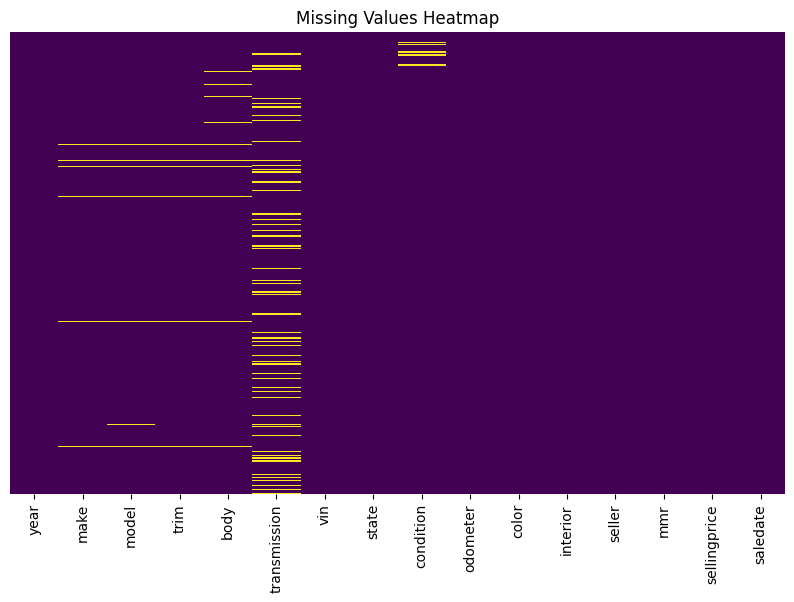

In [76]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [77]:
# Statistical overview of numerical columns
print("Statistical Overview of Numerical Columns:")
print(df.describe())

# For categorical columns
print("\nValue Counts for Each Categorical Column:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {column}")
    print(df[column].value_counts())


Statistical Overview of Numerical Columns:
                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  

Value Counts for Each Categorical Column:

Column: make
make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota

## 2. Data Wrangling

#Data Wrangling Code

In [78]:
# Impute missing values for numerical columns using median
df['condition'] = df['condition'].fillna(df['condition'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['mmr'] = df['mmr'].fillna(df['mmr'].median())


In [79]:
# Drop rows where the target variable is missing
df = df.dropna(subset=['sellingprice'])


In [80]:
# Fill categorical columns with 'Unknown'
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')


<ipython-input-80-b16bf0dd0647>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown')


In [81]:
# Drop rows where 'vin' is missing
df = df.dropna(subset=['vin'])


In [82]:
# Fill missing values in 'color' and 'interior' with mode
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])


In [83]:
# Drop rows where 'saledate' is missing
df = df.dropna(subset=['saledate'])


In [84]:
# Rename columns for clarity
df.rename(columns={
    'vin': 'vehicle_id',
    'mmr': 'market_value',
    'saledate': 'sale_date'
}, inplace=True)

# View updated column names
print(df.columns)


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vehicle_id',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'market_value', 'sellingprice', 'sale_date'],
      dtype='object')


In [85]:
# Convert categorical columns to category type
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
df[categorical_cols] = df[categorical_cols].astype('category')


In [86]:
# Parse the 'sale_date' column
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

<ipython-input-86-aa146cfd7418>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
<ipython-input-86-aa146cfd7418>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')


In [87]:
# Check for unparsed or missing dates
missing_dates = df[df['sale_date'].isna()]
print(f"Number of missing dates after parsing: {missing_dates.shape[0]}")
print(missing_dates)


Number of missing dates after parsing: 22
        year        make  model                    trim         body  \
408161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
417835  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
421289  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
424161  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
427040  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
427043  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
434424  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
444501  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
453794  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
461597  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
492484  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
497008  2015  Volkswagen  Jetta  SE PZEV w/Connectivity  Navitgation   
497011  2015  Volkswag

In [88]:
# Convert 'sale_date' to string type first
df['sale_date'] = df['sale_date'].astype(str)

# Strip the timezone information (GMT and timezone name)
df['sale_date_cleaned'] = df['sale_date'].str.replace(r' GMT[+-]\d{4} \([A-Za-z]*\)', '', regex=True)

# Now parse the cleaned date
df['sale_date'] = pd.to_datetime(df['sale_date_cleaned'], errors='coerce')

# Check the cleaned 'sale_date'
print(df[['sale_date', 'sale_date_cleaned']].head())


                   sale_date          sale_date_cleaned
0  2014-12-16 12:30:00+08:00  2014-12-16 12:30:00+08:00
1  2014-12-16 12:30:00+08:00  2014-12-16 12:30:00+08:00
2  2015-01-15 04:30:00+08:00  2015-01-15 04:30:00+08:00
3  2015-01-29 04:30:00+08:00  2015-01-29 04:30:00+08:00
4  2014-12-18 12:30:00+08:00  2014-12-18 12:30:00+08:00


<ipython-input-88-001c12d194d8>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['sale_date'] = pd.to_datetime(df['sale_date_cleaned'], errors='coerce')


In [89]:
# Drop rows where 'sale_date' could not be parsed
df = df[df['sale_date'].notna()]


In [90]:
print("Number of missing dates after fix:", df['sale_date'].isna().sum())
print(df[['sale_date', 'sale_date_cleaned']].head())


Number of missing dates after fix: 0
                   sale_date          sale_date_cleaned
0  2014-12-16 12:30:00+08:00  2014-12-16 12:30:00+08:00
1  2014-12-16 12:30:00+08:00  2014-12-16 12:30:00+08:00
2  2015-01-15 04:30:00+08:00  2015-01-15 04:30:00+08:00
3  2015-01-29 04:30:00+08:00  2015-01-29 04:30:00+08:00
4  2014-12-18 12:30:00+08:00  2014-12-18 12:30:00+08:00


In [91]:
# Step 1: Convert 'sale_date' to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# Step 2: Check for any unparsed dates
print("Number of missing dates after conversion:", df['sale_date'].isna().sum())

# Step 3: Extract year, month, day, and weekday
df['sale_year'] = df['sale_date'].dt.year
df['sale_month'] = df['sale_date'].dt.month
df['sale_day'] = df['sale_date'].dt.day
df['sale_weekday'] = df['sale_date'].dt.weekday  # 0=Monday, 6=Sunday



Number of missing dates after conversion: 163310


In [92]:
# Interaction between 'odometer' and 'condition'
df['odometer_condition'] = df['odometer'] / (df['condition'] + 1)


In [93]:
# Identify outliers using the IQR method
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['sellingprice'] >= lower_bound) & (df['sellingprice'] <= upper_bound)]


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df['odometer_scaled'] = scaler.fit_transform(df[['odometer']])

# Standard Scaling
scaler = StandardScaler()
df['condition_scaled'] = scaler.fit_transform(df[['condition']])


<ipython-input-94-2bf091c63731>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer_scaled'] = scaler.fit_transform(df[['odometer']])
<ipython-input-94-2bf091c63731>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition_scaled'] = scaler.fit_transform(df[['condition']])


In [95]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'make'
encoder = LabelEncoder()
df['make_encoded'] = encoder.fit_transform(df['make'])


In [96]:
# Add indicator for missing 'condition'
df['condition_missing'] = df['condition'].isnull().astype(int)


In [97]:
# Forward fill missing values
df['odometer'] = df['odometer'].fillna(method='ffill')


<ipython-input-97-3267bed2ec06>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['odometer'] = df['odometer'].fillna(method='ffill')


In [98]:
# Average selling price per make
avg_price_per_make = df.groupby('make')['sellingprice'].mean().reset_index()
print(avg_price_per_make)

# Total sales by year
total_sales_by_year = df.groupby('sale_year')['sellingprice'].sum().reset_index()
print(total_sales_by_year)


            make  sellingprice
0          Acura  13617.969019
1   Aston Martin           NaN
2           Audi  15792.636310
3            BMW  16907.895418
4        Bentley  22700.000000
..           ...           ...
92        subaru   3710.416667
93        suzuki   4810.000000
94        toyota   7339.105263
95    volkswagen   6145.833333
96            vw  13672.916667

[97 rows x 2 columns]
   sale_year  sellingprice
0     2014.0  5.523027e+08
1     2015.0  4.201982e+09


<ipython-input-98-6a153b892857>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_make = df.groupby('make')['sellingprice'].mean().reset_index()


In [99]:
# Randomly sample 10% of the data
df_sample = df.sample(frac=0.1, random_state=42)


In [100]:
# Save to a new CSV file
df.to_csv('/content/drive/MyDrive/dataset/cleaned_vehicle_data.csv', index=False)


## 2. EDA

In [102]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vehicle_id',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'market_value', 'sellingprice', 'sale_date', 'sale_date_cleaned',
       'sale_year', 'sale_month', 'sale_day', 'sale_weekday',
       'odometer_condition', 'odometer_scaled', 'condition_scaled',
       'make_encoded', 'condition_missing'],
      dtype='object')

### chart 1

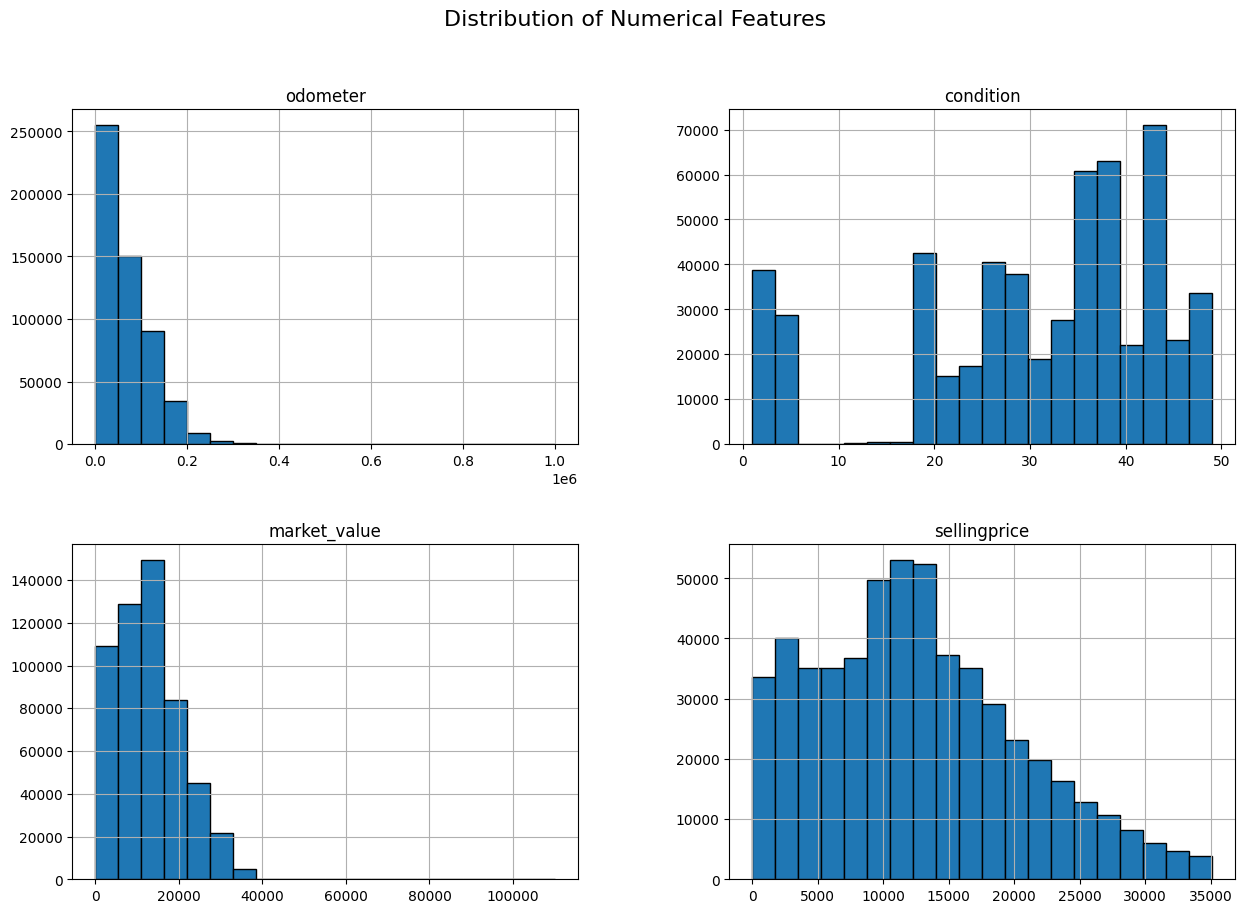

In [104]:
# chart 1
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
numerical_cols = ['odometer', 'condition', 'market_value', 'sellingprice']
df[numerical_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


**Why I Chose This Chart**

This grid of histograms helps to visualize the distribution of numerical variables in the dataset. It provides a clear overview of how values are spread for features like odometer, condition, market_value, and sellingprice, which are critical for understanding the dataset's underlying patterns.


**Purpose of This Chart**

Odometer: To observe mileage distribution and detect outliers or skewness.
Condition: To understand the quality ratings of the vehicles.
Market Value: To assess the typical price estimates for vehicles.
Selling Price: To compare the selling price distribution with the market value.
This chart aids in identifying normal trends, outliers, and transformations needed for predictive modeling.

**Insights from the Chart**

Odometer: Highly right-skewed, indicating that most vehicles have lower mileage, but a few have extremely high mileage.

Action: Apply logarithmic transformation to reduce skewness or consider filtering out outliers.
Condition: Appears to have a discrete distribution with certain fixed condition values (likely categorical levels encoded as numbers).

Action: Treat as categorical data for better analysis.
Market Value: Right-skewed, with a clustering of values at lower prices.

Action: Similar to the odometer, apply a log transformation or analyze pricing based on features like make and model.
Selling Price: Moderately right-skewed but more evenly distributed compared to market value.

Action: Investigate whether selling price is consistently lower or higher than market value to identify pricing strategies.

**Steps for Business Objective**

Analyze relationships between selling price and market value to determine pricing discrepancies.
Evaluate the impact of odometer readings and condition on pricing using scatterplots or regression analysis.
Explore filtering vehicles with extreme values for focused analysis on common vehicle types and customer trends.

### chart 2


<ipython-input-105-d919128a4b83>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-105-d919128a4b83>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-105-d919128a4b83>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-105-d919128a4b83>:8: FutureWarning: 

Passing `palette` without ass

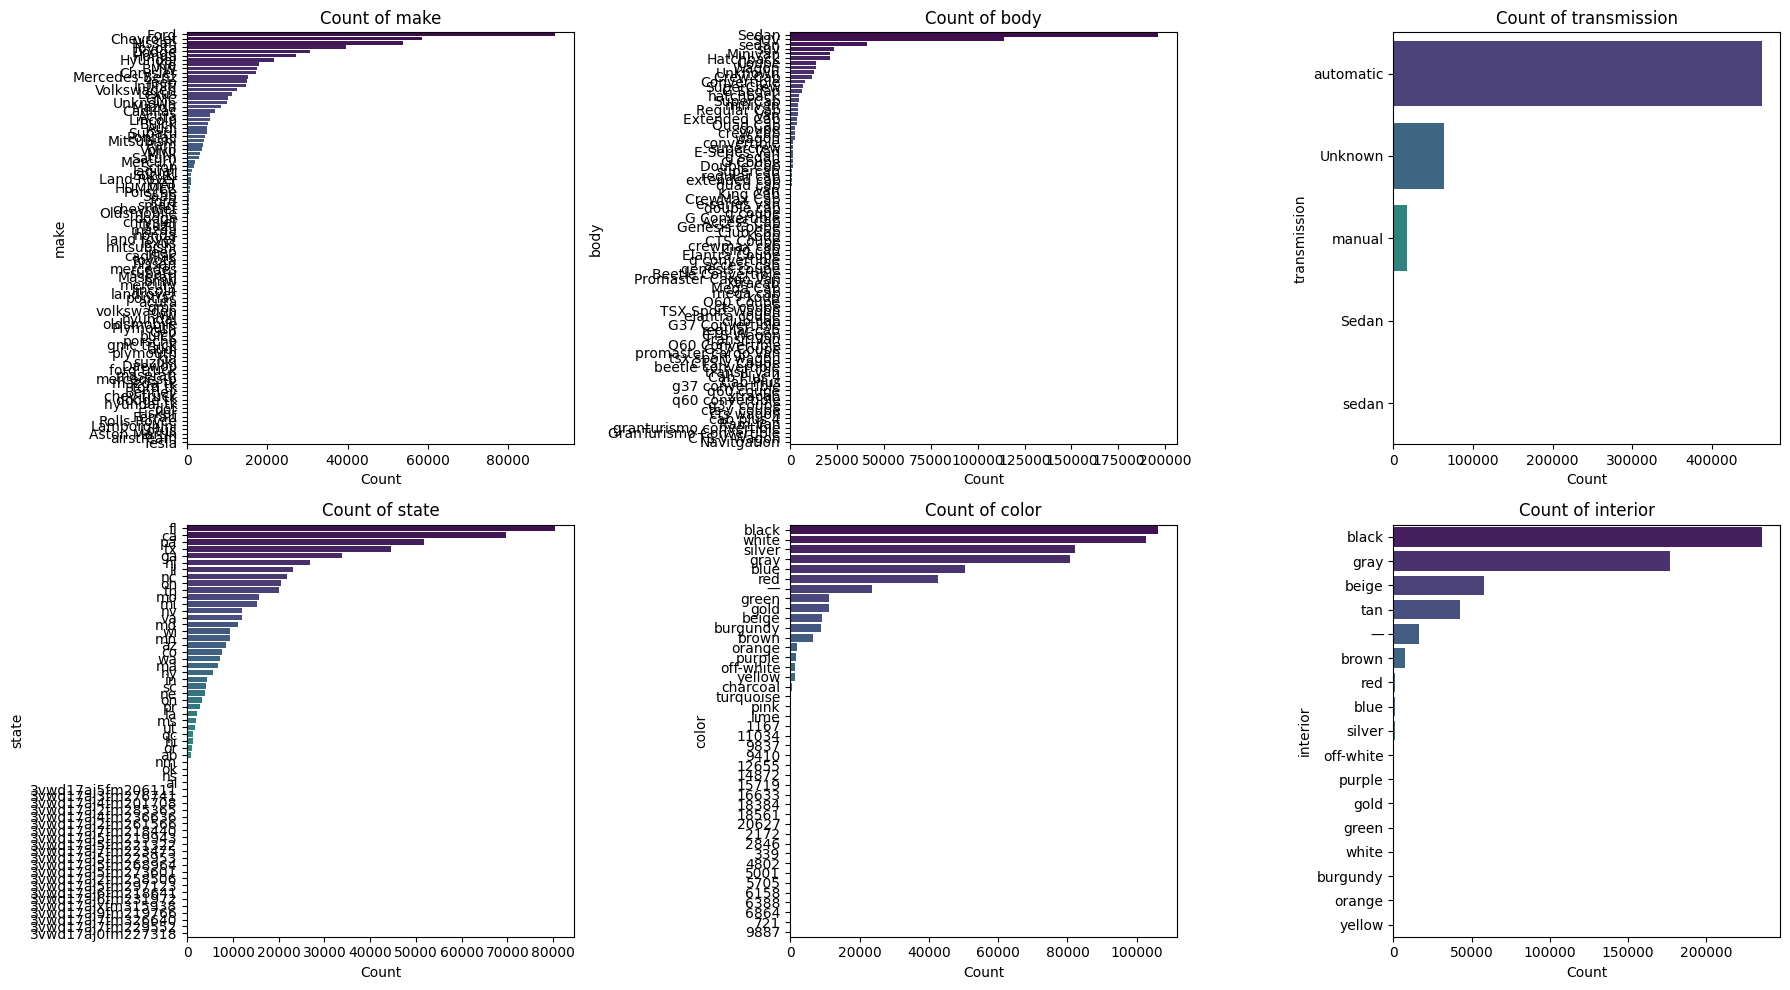

In [105]:
# Define categorical columns
categorical_cols = ['make', 'body', 'transmission', 'state', 'color', 'interior']

# Plot the count for each categorical variable
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Why I Choose This Chart**
I chose horizontal bar charts for these categorical variables because they are excellent for displaying the frequency (count) of categories. The horizontal layout makes it easier to compare long categorical labels, especially when the categories have long names, like car make or body type. Using horizontal bars also enhances the readability when there are many categories with large differences in frequency.

**2. Purpose of This Chart**

The purpose of these bar charts is to visualize the distribution of different categories within each variable. For example:

The make chart shows how many vehicles of each make are present in the dataset.
The body chart displays the distribution of car body types.
The transmission, state, color, and interior charts illustrate the variation in these features across the dataset.
These charts help identify the most common categories in each feature, which can be important for:

Identifying dominant car makes or body types.
Analyzing the availability of certain features like transmission types or car colors in the market.

**3. Outcomes and Insights from the Chart**
When you share the chart, here’s how to interpret the outcomes:

Make: A few makes (such as Ford, Chevrolet) will dominate the dataset, and it's possible that these makes are more common in the market. This may suggest a high demand for these brands, which is useful for inventory or marketing strategies.
Body: Certain body types (like sedan or SUV) will likely appear more frequently than others. This might indicate the popularity of certain car types among customers.
Transmission: If most cars are automatic, this aligns with the current trend in most markets, where automatic transmission cars are in demand.
State: The distribution of cars by state may show geographic regions where cars are more commonly listed, providing insight into regional market trends.
Color: Popular car colors (like black, white, or silver) might correlate with customer preferences or trends.
Interior: Popular interior colors (black, gray) can reflect common preferences or manufacturing trends.

**4. What Should Be Done to Best Achieve Business Objectives**

Target Popular Makes and Body Types: If certain makes or body types are more common, it would be beneficial to focus marketing, promotions, and inventory on these.
Expand in Popular Regions: If certain states have a higher volume of cars, expanding the availability or distribution channels in those states could help.
Offer Popular Car Features: Understanding that customers often prefer specific transmission types, colors, or interiors can guide product development and marketing campaigns.
Stock Inventory Based on Preferences: Knowing the most popular colors and interior styles can help in planning the types of cars to prioritize for stocking in showrooms.


###chart 3

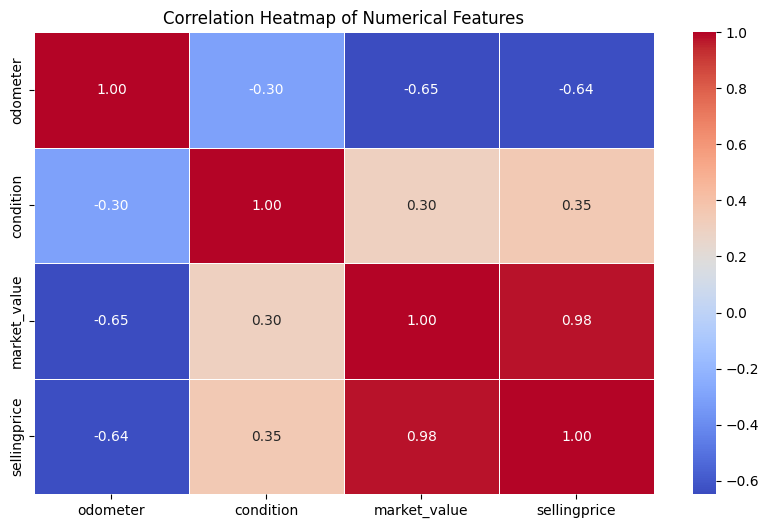

In [106]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**1. Why I Chose This Chart**
I chose a correlation heatmap to analyze the relationships between the numerical features in the dataset. A heatmap is ideal for this purpose as it clearly displays the correlation between multiple variables using color gradients, which makes it easy to identify strong or weak correlations visually. The color intensity indicates the strength of the correlation, which helps quickly highlight trends and relationships between variables.

**2. Purpose of This Chart**

The purpose of this heatmap is to explore the pairwise correlations between the following numerical features:

Odometer: The number of miles a vehicle has been driven.
Condition: The condition of the vehicle, likely a numerical score.
Market Value: The estimated market value of the car.
Selling Price: The final selling price of the vehicle.
By identifying correlations, this heatmap helps us understand which variables are strongly related and can influence each other. For example, understanding if selling price correlates strongly with market value can provide insight into how accurately the market values vehicles.

**3. Outcomes and Insights from the Chart**

Odometer vs Selling Price: There is a moderate negative correlation (-0.64), meaning as the odometer (mileage) increases, the selling price tends to decrease. This is expected since higher mileage typically reduces the value of a car.
Condition vs Selling Price: A weak positive correlation (0.35) indicates that a better condition of a vehicle might slightly increase its selling price.
Market Value vs Selling Price: A very high positive correlation (0.98) suggests that the selling price is almost directly tied to the market value of the vehicle. This suggests that vehicles are typically sold at close to their estimated market value.
Market Value vs Odometer: A strong negative correlation (-0.65) implies that vehicles with higher mileage are likely to have a lower market value, which aligns with expectations in the automotive market.

**4. What Should Be Done to Best Achieve Business Objectives**

Focus on Market Value: Since market value and selling price are strongly correlated, ensuring accurate estimation of market value will help in pricing decisions and profitability.
Minimize High-Mileage Vehicles in Inventory: Since higher odometer readings correlate with lower prices, consider stocking vehicles with lower mileage to maximize profitability.
Improve Vehicle Condition: Although the correlation between condition and price is moderate, improving the condition of vehicles (via repairs, detailing, etc.) could boost their resale value.
Refine Pricing Models: Since market value and selling price are almost identical, using market value as a key predictor for setting selling prices can optimize pricing strategies.

###chart 4

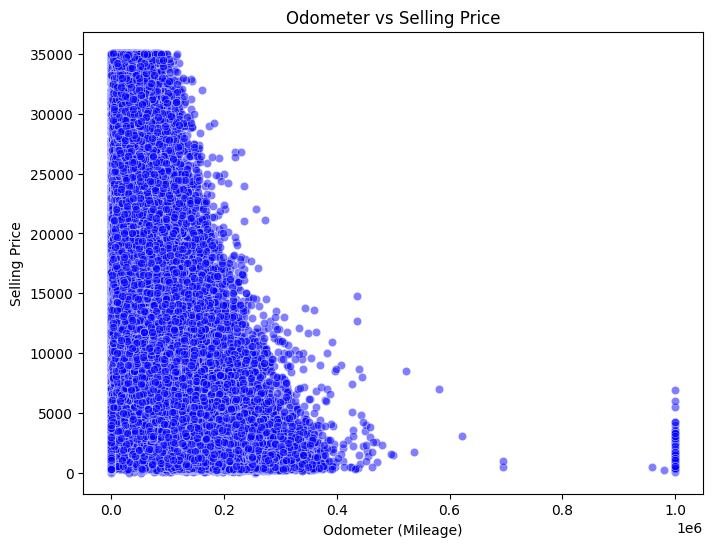

In [107]:
# Scatter plot between 'odometer' and 'sellingprice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=0.5, color='blue')
plt.title("Odometer vs Selling Price")
plt.xlabel("Odometer (Mileage)")
plt.ylabel("Selling Price")
plt.show()


1. Why I Chose This Chart
Odometer vs. Selling Price (Scatter Plot):

Reason for Choice: A scatter plot effectively visualizes the relationship between numerical variables, such as mileage (odometer reading) and selling price. It highlights patterns and outliers, offering insights into how mileage influences car value.

2. Purpose of This Chart
Odometer vs. Selling Price:

To explore the correlation between a car's mileage and its selling price. The goal is to determine whether higher mileage consistently leads to a lower price.

3. Outcomes and Insights from the Chart
Odometer vs. Selling Price:

The chart suggests a negative correlation—cars with higher mileage tend to have lower selling prices.
Extreme outliers with unusually low or high prices for specific mileage ranges may need further investigation.

4. What Should Be Done to Best Achieve Business Objectives
For the Scatter Plot:

Introduce a pricing model that adjusts dynamically based on mileage, factoring in depreciation patterns.
Target marketing efforts for low-mileage used cars, as they retain more value.

###chart 5

<ipython-input-108-b7a13b61c3d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['make'].isin(top_makes)], x='make', y='sellingprice', palette='Set2')


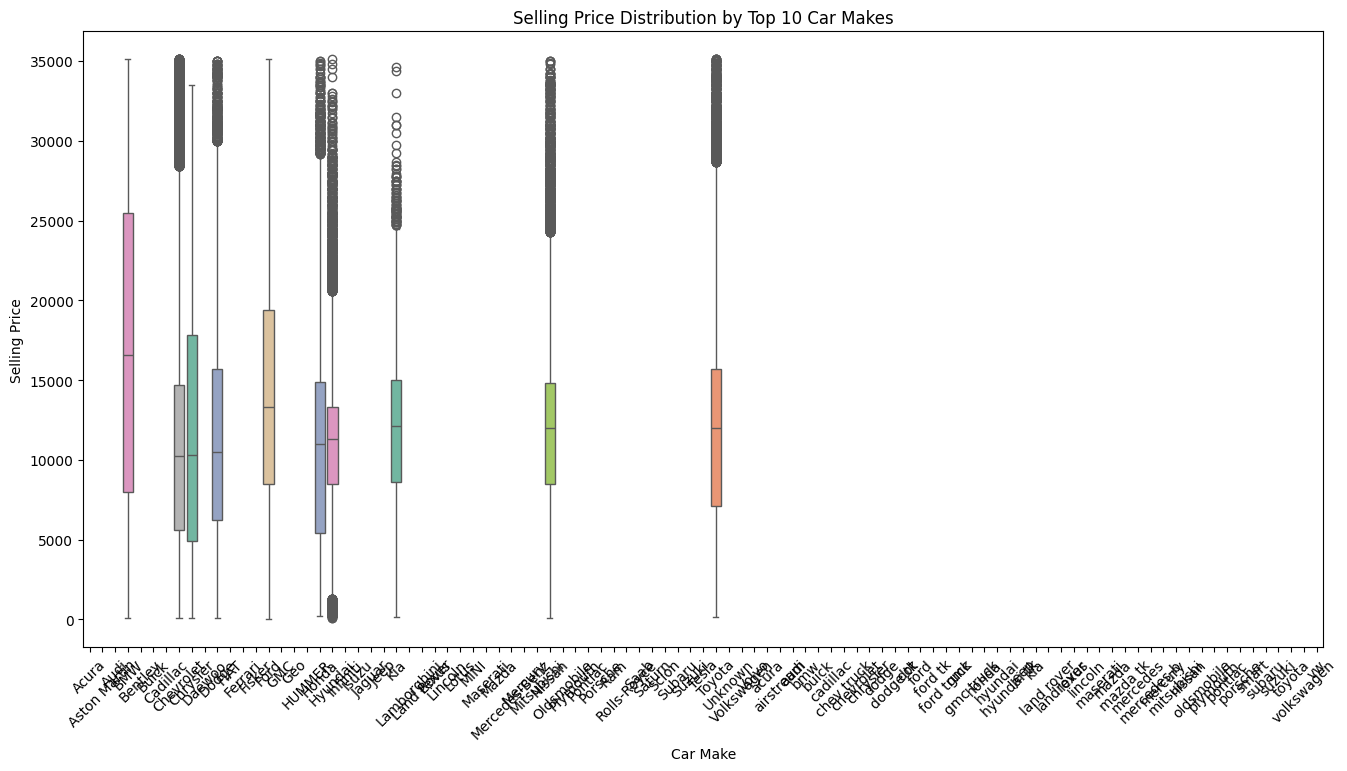

In [108]:
# Boxplot for selling price by car make
plt.figure(figsize=(16, 8))
top_makes = df['make'].value_counts().head(10).index
sns.boxplot(data=df[df['make'].isin(top_makes)], x='make', y='sellingprice', palette='Set2')
plt.title("Selling Price Distribution by Top 10 Car Makes")
plt.xticks(rotation=45)
plt.ylabel("Selling Price")
plt.xlabel("Car Make")
plt.show()


1. Why I Chose This Chart
Selling Price Distribution by Car Make (Box Plot):

Reason for Choice: A box plot summarizes the distribution of selling prices for different car makes. It helps identify median prices, variability, and potential outliers, offering a clear comparison across brands.

2. Purpose of This Chart
Selling Price Distribution by Car Make:

To compare price ranges across car makes, identify premium vs. budget brands, and highlight any brands with extreme pricing variability.

3. Outcomes and Insights from the Chart
Selling Price Distribution by Car Make:

Luxury brands (e.g., Mercedes, BMW) show higher median prices, while budget brands (e.g., Hyundai, Ford) have lower medians.
Wide variability in price ranges (e.g., Chevrolet) could indicate diverse models within the brand, from budget-friendly to premium vehicles.

4. What Should Be Done to Best Achieve Business Objectives
For the Box Plot:

Focus sales and promotions on brands with high variability to attract a broader customer base.
Use premium brands with higher medians to target luxury-segment customers and increase profit margins.

### chart 6

<ipython-input-109-f80a993c672c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='muted')


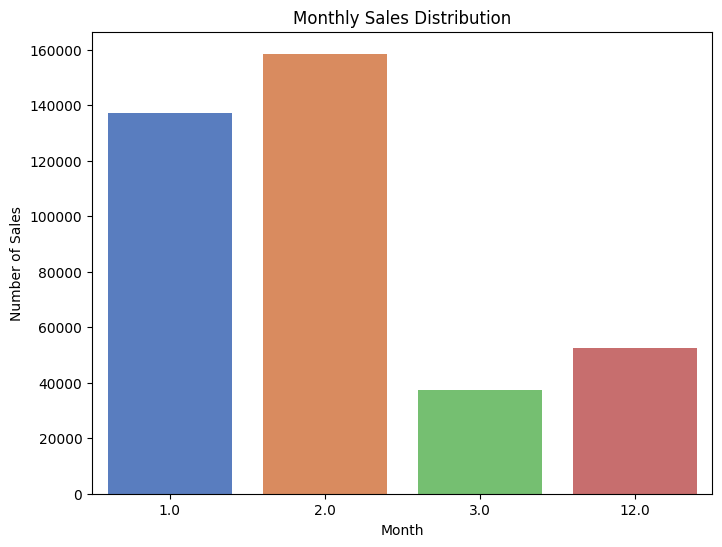

<ipython-input-109-f80a993c672c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='muted')


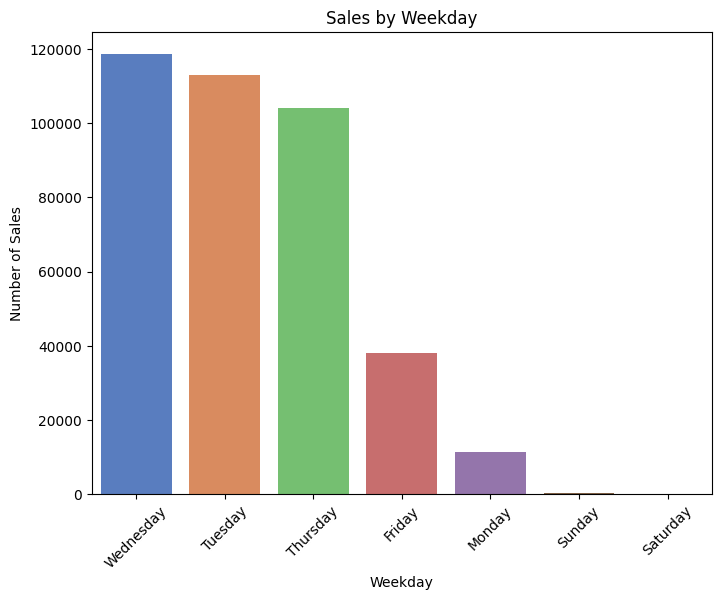

In [109]:
# Extract year and month from sale_date
df['sale_month'] = df['sale_date'].dt.month
df['sale_weekday'] = df['sale_date'].dt.day_name()

# Plot monthly sales
plt.figure(figsize=(8, 6))
monthly_sales = df['sale_month'].value_counts().sort_index()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='muted')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

# Plot weekday sales
plt.figure(figsize=(8, 6))
weekday_sales = df['sale_weekday'].value_counts()
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='muted')
plt.title("Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


### chart 7

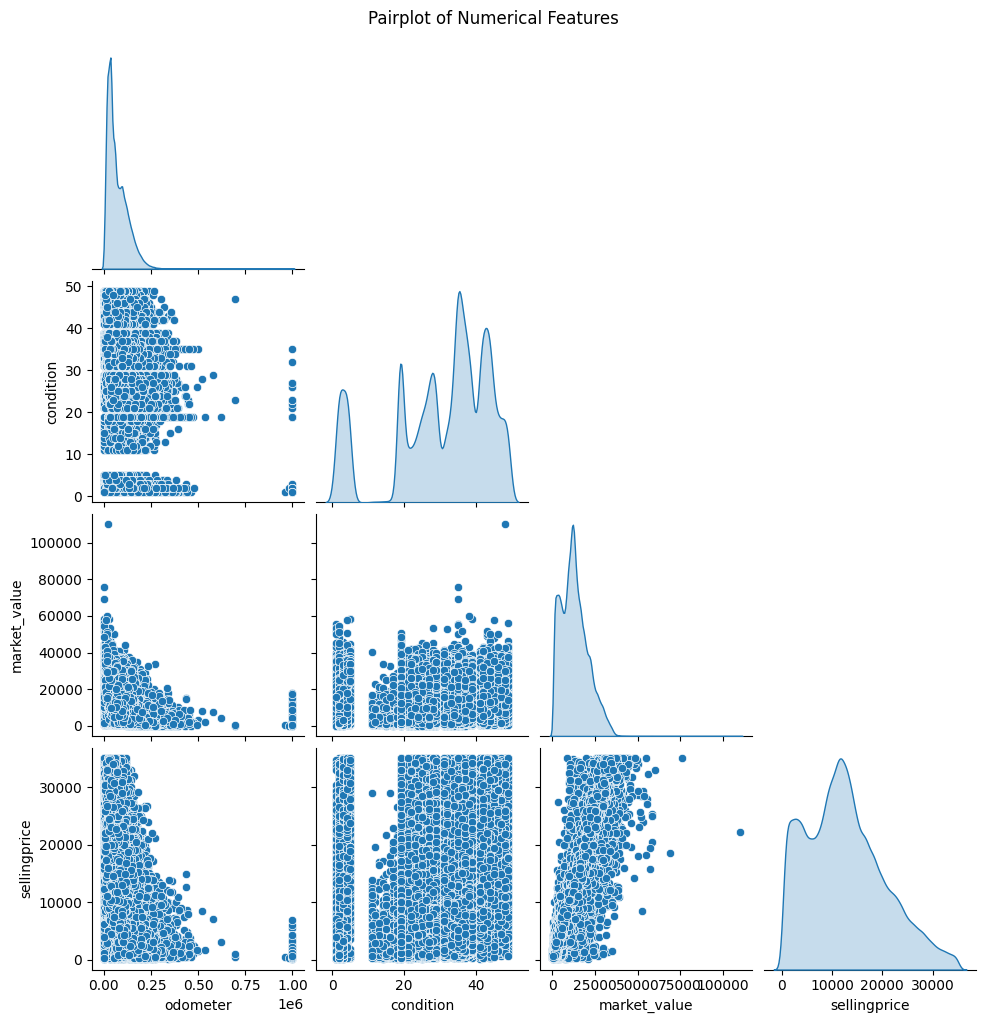

In [110]:
# Select subset of numerical variables
subset_cols = ['odometer', 'condition', 'market_value', 'sellingprice']
sns.pairplot(df[subset_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


### chart 8

<ipython-input-111-74e481975c51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='cool')
<ipython-input-111-74e481975c51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='cool')
<ipython-input-111-74e481975c51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='cool')
<ipython-input-111-74e481975c51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

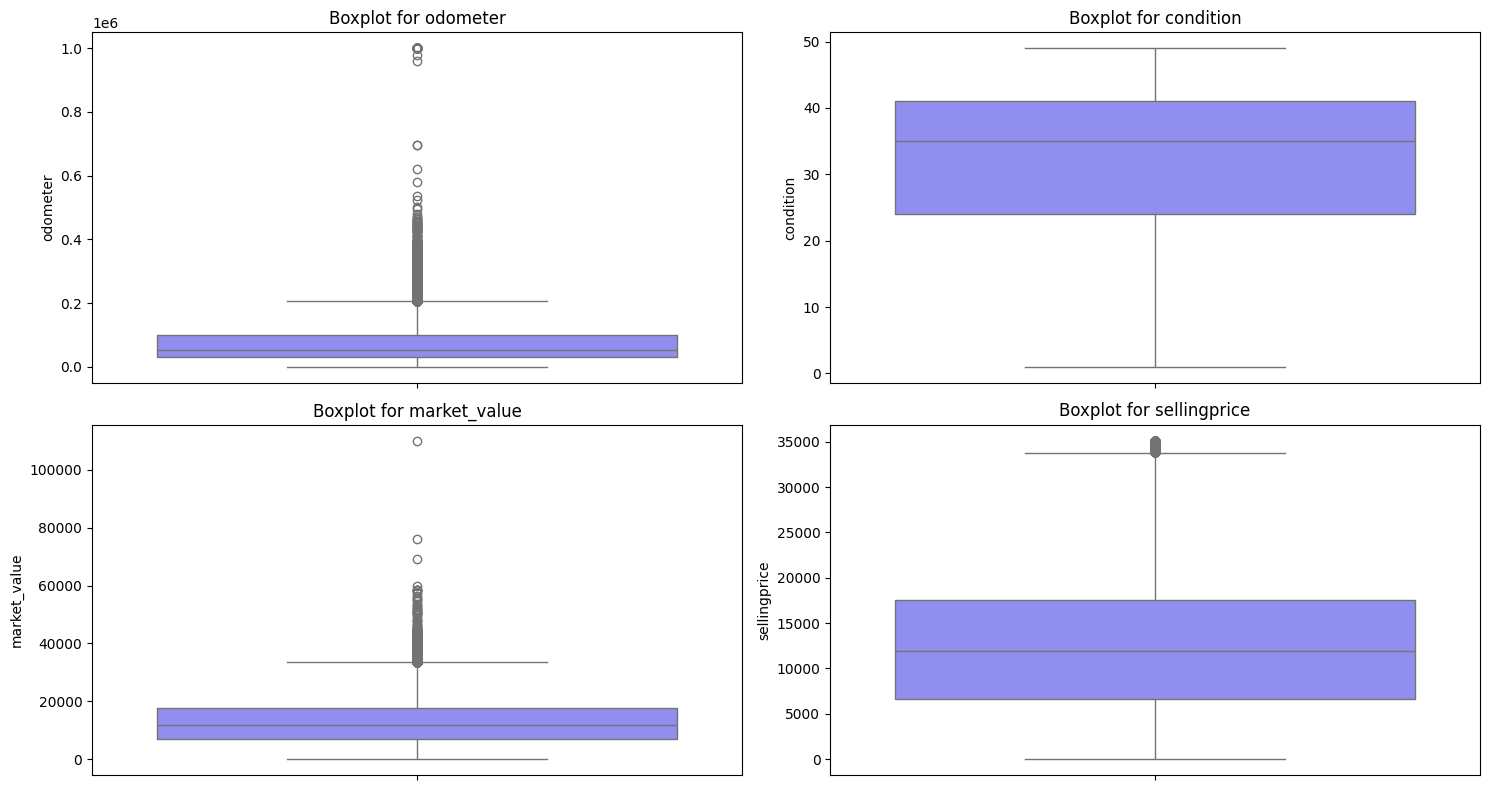

In [111]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, palette='cool')
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()
